# Восстановление золота из руды

# Название проекта
Восстановление золота из руды

# Описание исследования
Нам необходимо проанализировать информацию о процессе добытия золота из руды. В нашем распоряжении датасеты, описывающие ключевые показатели процесса. В итоге у нас должен получится прототип машинного обучения, предсказывающий коэффициент восстановления золота из золотосодержащей руды. Такая модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

# Цель исследования
Разработать прототип модели машинного обучения, предсказывающий коэффициент восстановления золота из золотосодержащей руды

## Подготовка данных

Импотрируем необходимые библиотеки и посморим наши датасеты

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [ ]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

У нас в распоряжении три файла: тренировочная выборка, тестовая и полностью исходные данные. Начнем с тренировочной выборки.

In [ ]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


87 столбцов в нашем датасете, 14149 строк, как мы видим не все заполненно.

In [ ]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Как мы видим в тестовой выборке 53 колонки, а в обучающей 87. Посмотрим каких колонок нет

In [ ]:
print(*train.columns.difference(test.columns), sep='\n')

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.

В тестовой выборке отсутствуют признаки параметра продукта и расчетные характеристики. Из условий задачи мы знаем, что некоторые параметры замеряются и/или рассчитываются позже. Следовательно это те самые параметры. Так же стоит отметить что отсутствуют целевые признаки, нам нужно будет их добавить.

Теперь рассмотрим всю таблицу.

In [ ]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Полный датасет содержит 19439 строк и 87 колонок.

Посмотрим на числовые показатели датасета в целом

In [ ]:
full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Некоторые колонки имеют достаточно большой разброс. Некоторые дажи отрицательный значения.

Проверим, что эффективность обогащения рассчитана правильно на обучающей выборке

In [ ]:
train['calculated_recovery'] = (train['rougher.output.concentrate_au']*
                          (train['rougher.input.feed_au'] - train['rougher.output.tail_au']))/(train['rougher.input.feed_au']*
                            (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))*100
print('Абсолютная средняя ошибка =', mean_absolute_error(train['rougher.output.recovery'], train['calculated_recovery']))

Абсолютная средняя ошибка = 9.73512347450521e-15


Абсолютная средняя ошибка крайне мала, значит эффективность обогащения расчитана верно. Удалим эту колонку, чтобы она не мешла в будущем.

In [ ]:
train = train.drop(columns='calculated_recovery', axis=1)

Проверим дубликаты на полном датасете

In [ ]:
full.duplicated().sum()

0

Дубликаты отсутствуют

Рассмотрим пропуски в данных, начнем с полной таблицы, затем проверим обучающую и тестовую

In [ ]:
pd.DataFrame(round(full.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
secondary_cleaner.output.tail_sol,9.000000
rougher.input.floatbank11_xanthate,2.000000
rougher.state.floatbank10_e_air,2.000000
primary_cleaner.output.concentrate_sol,2.000000
primary_cleaner.input.xanthate,1.000000
rougher.input.feed_sol,1.000000
rougher.input.feed_size,1.000000
rougher.input.feed_pb,1.000000
primary_cleaner.output.concentrate_pb,1.000000
secondary_cleaner.state.floatbank2_a_air,1.000000


In [ ]:
full.isna().sum().sort_values(ascending=False).head(20)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
rougher.input.feed_pb                        100
rougher.input.feed_sol                        99
primary_cleaner.output.tail_sol               62
rougher.input.floatbank11_sulfate             44
primary_cleaner.input.depressant              37
rougher.input.floatbank10_sulfate             34
primary_cleaner.input.sulfate                 24
rougher.output.concentrate_sol                23
secondary_cleaner.state.floatbank2_b_air      23
primary_cleaner.output.tail_pb                21
dtype: int64

In [ ]:
train.isna().sum().sort_values(ascending=False).head(20)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
rougher.input.floatbank10_sulfate             29
rougher.output.concentrate_sol                22
secondary_cleaner.state.floatbank2_b_air      21
primary_cleaner.input.sulfate                 20
primary_cleaner.output.tail_pb                15
dtype: int64

In [ ]:
pd.DataFrame(round(train.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
secondary_cleaner.output.tail_sol,11.000000
rougher.input.floatbank11_xanthate,3.000000
rougher.state.floatbank10_e_air,3.000000
primary_cleaner.output.concentrate_sol,2.000000
secondary_cleaner.state.floatbank2_a_air,2.000000
final.output.tail_pb,1.000000
final.output.concentrate_sol,1.000000
primary_cleaner.input.xanthate,1.000000
primary_cleaner.output.concentrate_pb,1.000000
rougher.input.feed_pb,1.000000


In [ ]:
test.isna().sum().sort_values(ascending=False).head(20)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
dtype: int64

В целом во всей таблице пропуски занимают максимум 9% в одной колонке, можно было бы их удалить. Но в обучаюющей выборке они занимают уже 11%, что не очень хорошо. По условию задачи приемлемо, если мы заменим пропуски по предудущим значениям, используем метод ffil.

In [ ]:
train_fill = train.fillna(method='ffill')
test_fill = test.fillna(method='ffill')
full_fill = full.fillna(method='ffill')

Добавим в тестовую выборку целевые признаки, для подсчета метрики качества модели.

In [ ]:
merge_test_fill = test_fill.merge(
    full_fill[['final.output.recovery', 'rougher.output.recovery', 'date']], how='left', on='date')

Удалим даты из наших таблиц, они для нас не бессмыленны

In [ ]:
train_fill = train_fill.drop('date', axis=1)
merge_test_fill = merge_test_fill.drop('date', axis=1)
full_fill = full_fill.drop('date', axis=1)

Мы подготовили данные. Посмотрели количество пропусков и дубликатов. Заменили пустые значения ближайшими

## Анализ данных

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
Начнем с самого главного для нас: с золота.

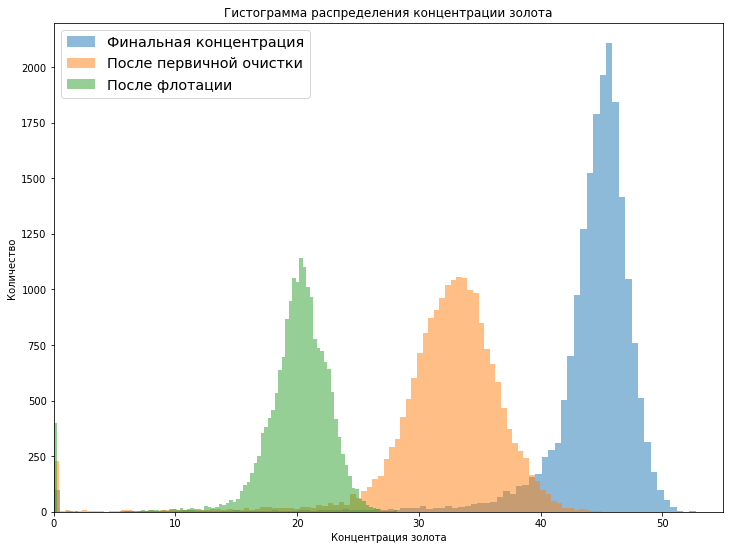

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(full_fill['final.output.concentrate_au'], bins=100, label = 'Финальная концентрация', alpha=.5)
plt.hist(full_fill['primary_cleaner.output.concentrate_au'], bins=100, label = 'После первичной очистки', alpha=.5)
plt.hist(full_fill['rougher.output.concentrate_au'], bins=100, label = 'После флотации', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 2200])

plt.xlabel('Концентрация золота')
plt.ylabel('Количество')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентрации золота')
plt.show()

Как мы видим концентрация золота растет после каждого этапа обработки. Так же стоит отметить, что есть нулевые показатели. и длинные хвосты к нулю

Теперь посмотрим что происходит с серебром

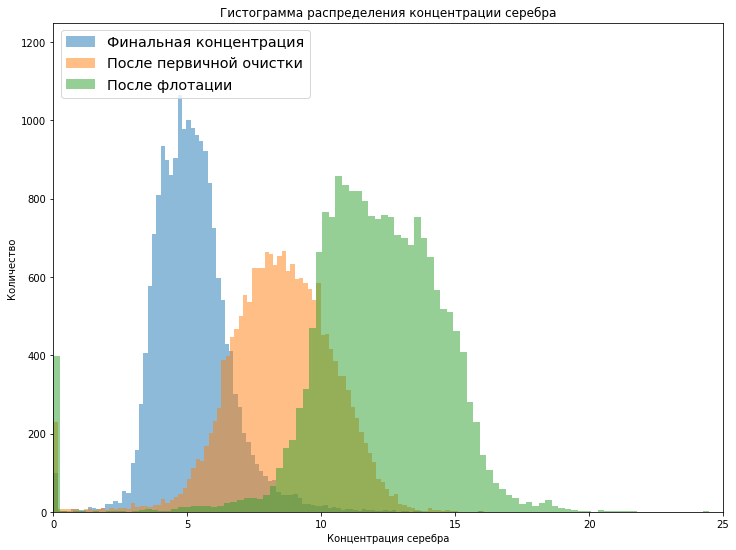

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(full_fill['final.output.concentrate_ag'], bins=100, label = 'Финальная концентрация', alpha=.5)
plt.hist(full_fill['primary_cleaner.output.concentrate_ag'], bins=100, label = 'После первичной очистки', alpha=.5)
plt.hist(full_fill['rougher.output.concentrate_ag'], bins=100, label = 'После флотации', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 1250])

plt.xlabel('Концентрация серебра')
plt.ylabel('Количество')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентрации серебра')
plt.show()

Как мы видим наибольшее количество серебра убирают после флотации, затем количество постепенно уменьшается.

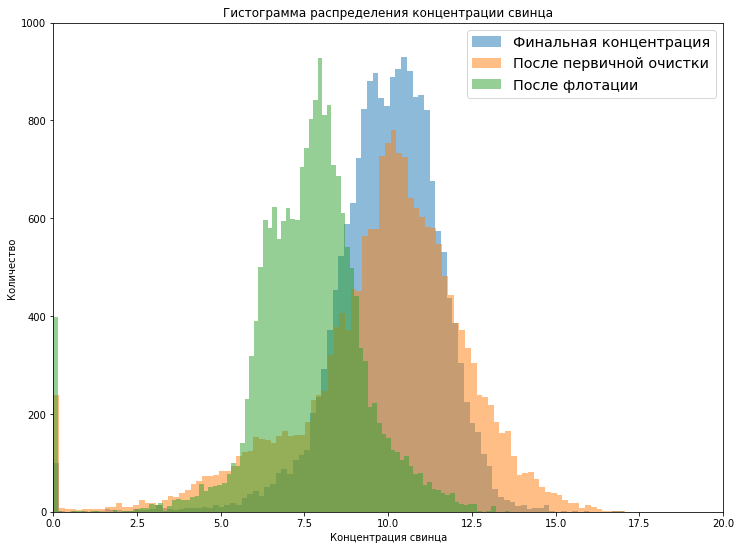

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(full_fill['final.output.concentrate_pb'], bins=100, label = 'Финальная концентрация', alpha=.5)
plt.hist(full_fill['primary_cleaner.output.concentrate_pb'], bins=100, label = 'После первичной очистки', alpha=.5)
plt.hist(full_fill['rougher.output.concentrate_pb'], bins=100, label = 'После флотации', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 1000])

plt.xlabel('Концентрация свинца')
plt.ylabel('Количество')

plt.legend(loc='upper right', fontsize='x-large')

plt.title('Гистограмма распределения концентрации свинца')
plt.show()

Свинец убирают практически одинаково со всех этапов. Видимо от него сложно очищать металл.

Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

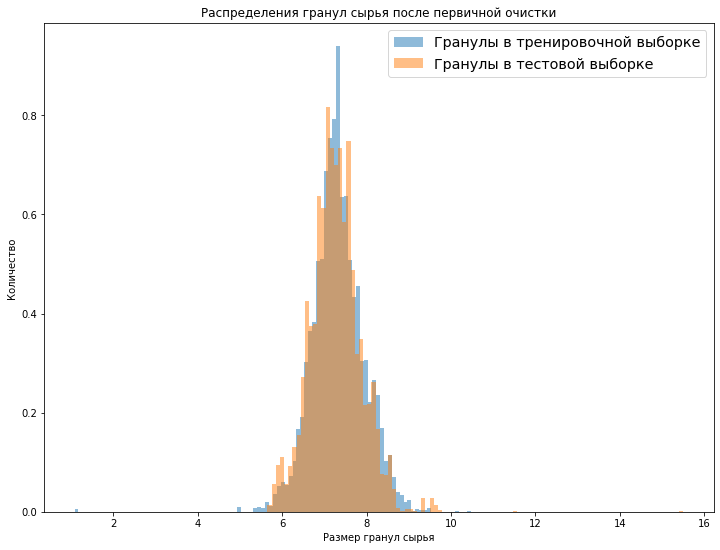

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(train_fill['primary_cleaner.input.feed_size'],
         density=True,
         bins=100,
         label = 'Гранулы в тренировочной выборке',
         alpha=.5)
plt.hist(merge_test_fill['primary_cleaner.input.feed_size'],
         density=True,
         bins=100,
         label = 'Гранулы в тестовой выборке',
         alpha=.5)

plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество')

plt.legend(loc='upper right', fontsize='x-large')

plt.title('Распределения гранул сырья после первичной очистки')
plt.show()

Плотности практически одинаковые, с этим проблем нет, можем спокойно создавать модель и проверять на тестовой выборке.

Посчитаем концентрацию всех веществ на каждой стадии

In [ ]:
rougher_input_feed = (full_fill['rougher.input.feed_ag'] +
                     full_fill['rougher.input.feed_pb'] +
                     full_fill['rougher.input.feed_sol'] +
                     full_fill['rougher.input.feed_au'])

rougher_output_concentrate = (full_fill['rougher.output.concentrate_ag'] +
                             full_fill['rougher.output.concentrate_pb'] +
                             full_fill['rougher.output.concentrate_sol'] +
                             full_fill['rougher.output.concentrate_au'])

final_output_concentrate = (full_fill['final.output.concentrate_ag'] +
                           full_fill['final.output.concentrate_pb'] +
                           full_fill['final.output.concentrate_sol'] +
                           full_fill['final.output.concentrate_au'])

In [ ]:
plt.figure(figsize=[12,9])

plt.hist(rougher_input_feed , bins=100, label = 'в сырье', alpha=.5)
plt.hist(rougher_output_concentrate , bins=100, label = 'в черновом концентрате', alpha=.5)
plt.hist(final_output_concentrate , bins=100, label = 'в финальном концентрате', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 2500])

plt.xlabel('Суммарная концентраця')
plt.ylabel('Количество')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Суммарная концентрация всех веществ')
plt.show()

Как мы видим, чем больше стадий обработок, тем выше и наш график. Так повышается концентрация веществ. В целом же распределение нормальное, но слева у нас относильно длинный хвост.

Удалим нулевые значения и приведем количество признаков в обучающей выборке к тестовой

In [ ]:
train_fill = train_fill[(train_fill['final.output.concentrate_pb'] != 0) &
                        (train_fill['final.output.concentrate_ag'] != 0) &
                        (train_fill['final.output.concentrate_au'] != 0) &
                        (train_fill['primary_cleaner.output.concentrate_pb'] != 0) &
                        (train_fill['primary_cleaner.output.concentrate_ag'] != 0) &
                        (train_fill['primary_cleaner.output.concentrate_au'] != 0) &
                        (train_fill['rougher.output.concentrate_pb'] != 0) &
                        (train_fill['rougher.output.concentrate_ag'] != 0) &
                        (train_fill['rougher.output.concentrate_au'] != 0)]

In [ ]:
columns_del = set(train_fill.columns) - set(merge_test_fill.columns)
train_fill = train_fill.drop(columns=columns_del, axis=1)
print(train_fill.shape)
print(merge_test_fill.shape)

Мы посмотрели распределение металла на разных стадиях обработки, сколько всего металла мы получаем после всех стадий. Удалили нулевые значение и лишние колонки.

## Модель

Напишем функцию для расчета метрик sMAPE и итоговой sMAPE

In [ ]:
def smape(features,predict):
    s = np.mean(abs(features - predict)/((abs(features)+abs(predict))/2))*100
    return s

In [ ]:
def final_smape(smape_rougher,smape_final):
    s = 0.25*smape_rougher + 0.75*smape_final
    return s

Теперь подготовим выборки для обучения и расчета эффективности модели

In [ ]:
features_train = train_fill.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

target_train_rougher = train_fill['rougher.output.recovery']
target_train_final = train_fill['final.output.recovery']

In [ ]:
features_test = merge_test_fill.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

target_test_rougher = merge_test_fill['rougher.output.recovery']
target_test_final = merge_test_fill['final.output.recovery']

Теперь обучим наши модели. Начнем с дерева решений

In [ ]:
smape_scorer = make_scorer(smape) #, greater_is_better=False

In [ ]:
best_smape_rougher = 20
for depth in range(1,11,1):
    model_tree_rougher = DecisionTreeRegressor(max_depth=depth, random_state=12345).fit(features_train,target_train_rougher)
    scores_tree_rougher = cross_val_score(model_tree_rougher,
                                          features_train,
                                          target_train_rougher,
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_rougher = np.mean(abs(scores_tree_rougher))
    print(f'Глубина дерева: {depth}  Средняя оценка качества {smape_rougher}')
    if smape_rougher < best_smape_rougher:
        best_smape_rougher = smape_rougher
        best_model_tree_rougher = model_tree_rougher
        best_depth = depth
print()
print(f"Лучшая модель при глубине дерева {best_depth}, с оценкой {best_smape_rougher}")

Как мы видим, лучшая глубина равна 4, сохраним модель и ключевые показатели.

Теперь рассмотрим дерево решений для финального концентрата

In [ ]:
best_smape_final = 20
for depth in range(1,11,1):
    model_tree_final = DecisionTreeRegressor(max_depth=depth, random_state=12345).fit(features_train,target_train_final)
    scores_tree_final = cross_val_score(model_tree_final,
                                          features_train,
                                          target_train_final,
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_final = np.mean(abs(scores_tree_final))
    print(f'Глубина дерева: {depth}  Средняя оценка качества {smape_final}')
    if smape_final < best_smape_final:
        best_smape_final = smape_final
        best_model_tree_final = model_tree_final
        best_depth = depth
print()
print(f"Лучшая модель при глубине дерева {best_depth}, с оценкой {best_smape_final}")

Лучший результат при глубине 3, а у чернового концентрата при глубине 4. Теперь расчитаем общий sMAPE.

Теперь посчитаем общий sMAPE

In [ ]:
final_smape(best_smape_rougher, best_smape_final)

Посмотрим что покажет случайный лес

In [ ]:
best_smape_rougher = 20
for estimators in range(1,110,10):
    model_forest_rougher = RandomForestRegressor(max_depth=3,
                                                 n_estimators=estimators,
                                                 random_state=12345).fit(features_train,target_train_rougher)
    scores_forest_rougher = cross_val_score(model_forest_rougher,
                                          features_train,
                                          target_train_rougher,
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_rougher = np.mean(abs(scores_forest_rougher))
    print(f'Количество деревьев: {estimators}  Средняя оценка качества {smape_rougher}')
    if smape_rougher < best_smape_rougher:
        best_smape_rougher = smape_rougher
        best_model_forest_rougher = model_forest_rougher
        best_estimators = estimators
print()
print(f"Лучшая модель при количестве деревьев {best_estimators}, с оценкой {best_smape_rougher}")

Случайный лес показал результат лучше чем дерево решений. Посмотрим что будет на финальном концентрате

In [ ]:
best_smape_final = 20
for estimators in range(1,110,10):
    model_forest_final = RandomForestRegressor(max_depth=3,
                                             n_estimators=estimators,
                                             random_state=12345).fit(features_train,target_train_final)
    scores_forest_final = cross_val_score(model_forest_final,
                                          features_train,
                                          target_train_final,
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_final = np.mean(abs(scores_forest_final))
    print(f'Количество деревьев: {estimators}  Средняя оценка качества {smape_final}')
    if smape_final < best_smape_final:
        best_smape_final = smape_final
        best_model_forest_final = model_forest_final
        best_estimators = estimators
print()
print(f"Лучшая модель при количестве деревьев {best_estimators}, с оценкой {best_smape_final}")

Финальный концентрат показал большую ошибку, по сравнению с черновым, но все же лучше, чем у дерева

In [ ]:
final_smape(best_smape_rougher, best_smape_final)

Общий sMAPE оказался так же лучше. На данный момент это лучшая модель

Теперь линейная регрессия

In [ ]:
model_linear_rougher = LinearRegression().fit(features_train,target_train_rougher)
scores_linear_rougher = cross_val_score(model_linear_rougher,
                                          features_train,
                                          target_train_rougher,
                                          scoring = smape_scorer,
                                          cv = 5)
smape_rougher = np.mean(abs(scores_linear_rougher))

print(f"Оценка линейной регрессии {smape_rougher}")

In [ ]:
model_linear_final = LinearRegression().fit(features_train,target_train_final)
scores_linear_final = cross_val_score(model_linear_final,
                                          features_train,
                                          target_train_final,
                                          scoring = smape_scorer,
                                          cv = 5)
smape_final = np.mean(abs(scores_linear_final))

print(f"Оценка линейной регрессии {smape_final}")

In [ ]:
final_smape(smape_rougher, best_smape_final)

Линейная регрессия оказалась хуже случайного леса.

Наилучшая модель оказалась случайный лес по общему sMAPE, для чернового концентрата с количеством деревьев 81, для финального концентрата с 41.

Теперь посмотрим как наша модель покажет себя на тестовой выборке

In [ ]:
rogher_predict = best_model_forest_rougher.predict(features_test)
final_predict = best_model_forest_final.predict(features_test)

print(f'Оценка качества предсказаний чернового концентрата {smape(target_test_rougher,rogher_predict)}')
print(f'Оценка качества предсказаний финального концентрата {smape(target_test_final,final_predict)}')
print(f'Финальная оценка {final_smape(smape(target_test_rougher,rogher_predict),smape(target_test_final,final_predict))}')

Показатель немного хуже, чем на обучающей выборке, но в целом вполне неплохо. Теперь сравним нашу модель с константной.

Создадим нашу константную модель, обучим и посчитаем sMAPE

In [ ]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train,target_train_rougher)
dummy_rougher_predict = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = smape(target_test_rougher, dummy_rougher_predict)
print(f'Оценка качества предсказаний чернового концентрата {smape_dummy_rougher}')

In [ ]:
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features_train,target_train_final)
dummy_final_predict = dummy_regressor_final.predict(features_test)
smape_dummy_final = smape(target_test_final, dummy_final_predict)
print(f'Оценка качества предсказаний финального концентрата {smape_dummy_final}')

In [ ]:
print(f'Финальная оценка {final_smape(smape_dummy_rougher, smape_dummy_final)}')

Наша модель совсем немного лучше констаной, всего на 0,1, но думаю, что для моего опыта вполне неплохой результат.

## Вывод

Таким образом, мы проанализировали датасет с данными о технологическом процессе добычи золота из руды. Посмотрели какие металлы являются побочными при добыче золота, оценили их размеры. Немного почистили датасет для более эффектичного обучения модели. Проанализировали работу дерева решений, случайного леса и линейной регрессии. Выбрали наиболее подходящую модель, а именно модель случайного леса с гиперпараметрами 21 и 31 для чернового и финального концентрата соответственно.